<a href="https://colab.research.google.com/github/C23-PS418/Bicaraku/blob/ML/CNN_Bicaraku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflowjs

In [1]:
!gdown --id 1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
!gdown --id 17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
To: /content/train_alphabet2.csv
100% 239M/239M [00:01<00:00, 120MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I
To: /content/validation_alphabet2.csv
100% 29.5M/29.5M [00:00<00:00, 203MB/s]


In [2]:
import pandas as pd
import tensorflow as tf
import csv
import random

In [5]:
# Shuffle CSV rows

list_datasets = ['train_alphabet2.csv', 'validation_alphabet2.csv']

for dataset in list_datasets:

  # Read the CSV file
  with open(dataset, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

  # Shuffle the rows
  random.shuffle(rows)

  # Write the shuffled rows to a new CSV file
  with open(dataset, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [6]:
train_df = pd.read_csv('train_alphabet2.csv')
val_df = pd.read_csv('validation_alphabet2.csv')

train_df.head()

,W,220,219,219.1,220.1,221,221.1,221.2,220.2,221.3,...,77.5,87.5,125.8,157.4,179.13,223.54,225.59,226.83,227.65,228.57
0,O,149,137,124,153,147,134,138,138,150,...,101,94,97,84,94,94,88,86,84,87
1,N,167,166,166,168,168,168,169,168,167,...,130,127,127,127,125,122,121,120,120,121
2,E,216,221,222,224,224,223,232,244,243,...,96,97,100,103,106,112,118,124,106,45
3,B,56,81,80,80,81,81,82,81,82,...,138,137,135,133,132,132,134,139,145,121
4,M,21,24,12,66,161,156,212,238,240,...,48,10,11,12,15,11,36,96,113,110


In [7]:
train_label = train_df[train_df.columns[0]]
val_label = val_df[val_df.columns[0]]

print(train_label.shape)

(25998,)


In [8]:
train_df.drop(columns=train_df.columns[0], axis=1, inplace=True)
val_df.drop(columns=val_df.columns[0], axis=1, inplace=True)

train_df.head(5)

,220,219,219.1,220.1,221,221.1,221.2,220.2,221.3,222,...,77.5,87.5,125.8,157.4,179.13,223.54,225.59,226.83,227.65,228.57
0,149,137,124,153,147,134,138,138,150,150,...,101,94,97,84,94,94,88,86,84,87
1,167,166,166,168,168,168,169,168,167,167,...,130,127,127,127,125,122,121,120,120,121
2,216,221,222,224,224,223,232,244,243,245,...,96,97,100,103,106,112,118,124,106,45
3,56,81,80,80,81,81,82,81,82,85,...,138,137,135,133,132,132,134,139,145,121
4,21,24,12,66,161,156,212,238,240,246,...,48,10,11,12,15,11,36,96,113,110


In [9]:
train_data = train_df.values
val_data = val_df.values

train_data.shape

(25998, 2500)

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_label = label_binarizer.fit_transform(train_label)
val_label = label_binarizer.fit_transform(val_label)
train_label[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

In [11]:
# Normalize the data
train_data = train_data / 255.0
val_data = val_data / 255.0

In [12]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
train_data = train_data.reshape(-1,50,50,1)
val_data = val_data.reshape(-1,50,50,1)

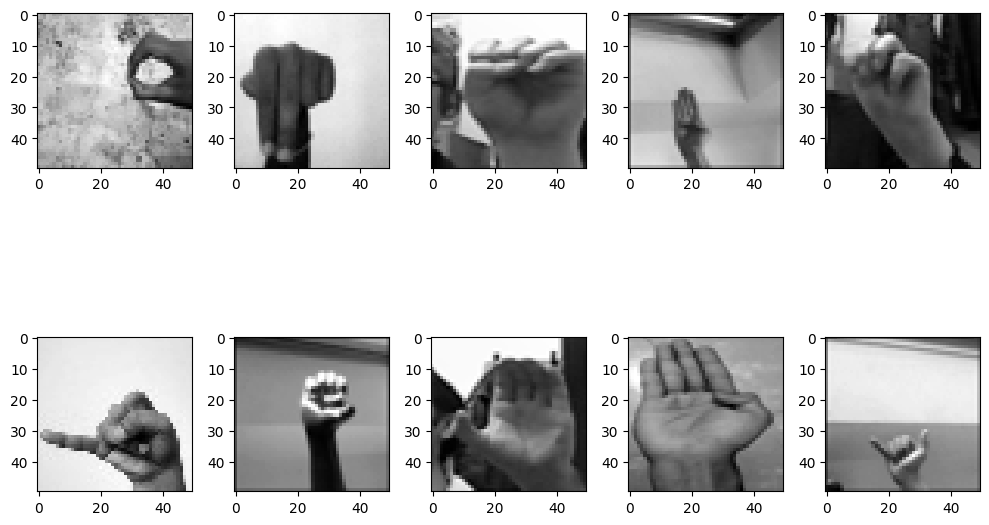

In [13]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_data[k].reshape(50, 50), cmap='gray')
        k += 1
    plt.tight_layout()    

In [14]:
# With data augmentation to prevent overfitting

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_data)

In [15]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(AccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            print(f"\nReached target accuracy of {self.target_accuracy*100}%")
            self.model.stop_training = True

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(125 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(100 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 512 , activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units = 26 , activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 125)       1250      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 125)      500       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 125)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 100)       112600    
                                                                 
 dropout (Dropout)           (None, 25, 25, 100)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 100)      4

In [17]:
# Define your callback
target_accuracy = 0.99
accuracy_callback = AccuracyCallback(target_accuracy)

# Train the model with the callback
history = model.fit(datagen.flow(train_data, train_label, batch_size = 128),
                    epochs = 30, 
                    validation_data = (val_data, val_label),
                    callbacks = [accuracy_callback])

Epoch 1/30
204/204 [==============================] - 30s 87ms/step - loss: 2.4660 - accuracy: 0.3016 - val_loss: 4.4071 - val_accuracy: 0.0520
Epoch 2/30
204/204 [==============================] - 18s 85ms/step - loss: 1.3020 - accuracy: 0.5933 - val_loss: 3.6847 - val_accuracy: 0.0942
Epoch 3/30
204/204 [==============================] - 17s 83ms/step - loss: 0.9005 - accuracy: 0.7152 - val_loss: 1.0913 - val_accuracy: 0.6620
Epoch 4/30
204/204 [==============================] - 18s 87ms/step - loss: 0.7028 - accuracy: 0.7747 - val_loss: 1.0111 - val_accuracy: 0.6827
Epoch 5/30
204/204 [==============================] - 17s 85ms/step - loss: 0.5688 - accuracy: 0.8156 - val_loss: 0.5613 - val_accuracy: 0.8261
Epoch 6/30
204/204 [==============================] - 17s 81ms/step - loss: 0.4701 - accuracy: 0.8492 - val_loss: 0.5927 - val_accuracy: 0.8159
Epoch 7/30
204/204 [==============================] - 17s 81ms/step - loss: 0.3998 - accuracy: 0.8698 - val_loss: 0.3140 - val_accuracy:

In [18]:
print("Accuracy of the model is - " , model.evaluate(val_data,val_label)[1]*100 , "%")

102/102 [==============================] - 1s 5ms/step - loss: 0.4444 - accuracy: 0.9311
Accuracy of the model is -  93.10557246208191 %


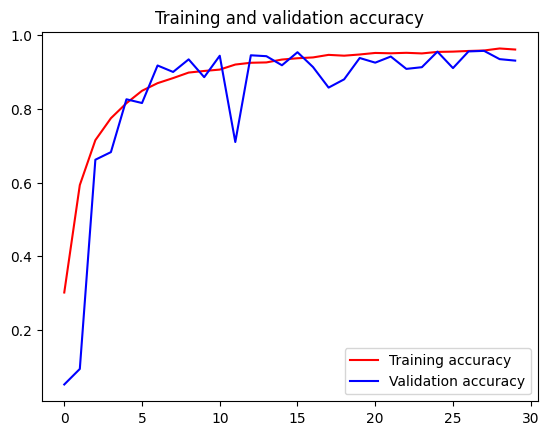

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [20]:
predictions = model.predict(val_data)
import numpy as np
print(np.argmax(val_label[:20], axis=1))
print(np.argmax(predictions[:20], axis=1))

102/102 [==============================] - 1s 5ms/step
[ 8  5 21  9  0  0 17  9 23  3 25  2 18 23  3 14 21  0 22 24]
[ 8  5 21  9  0  0 17  9 23  3 25  2 18 23  3 14 21  0 22 24]


<Axes: >

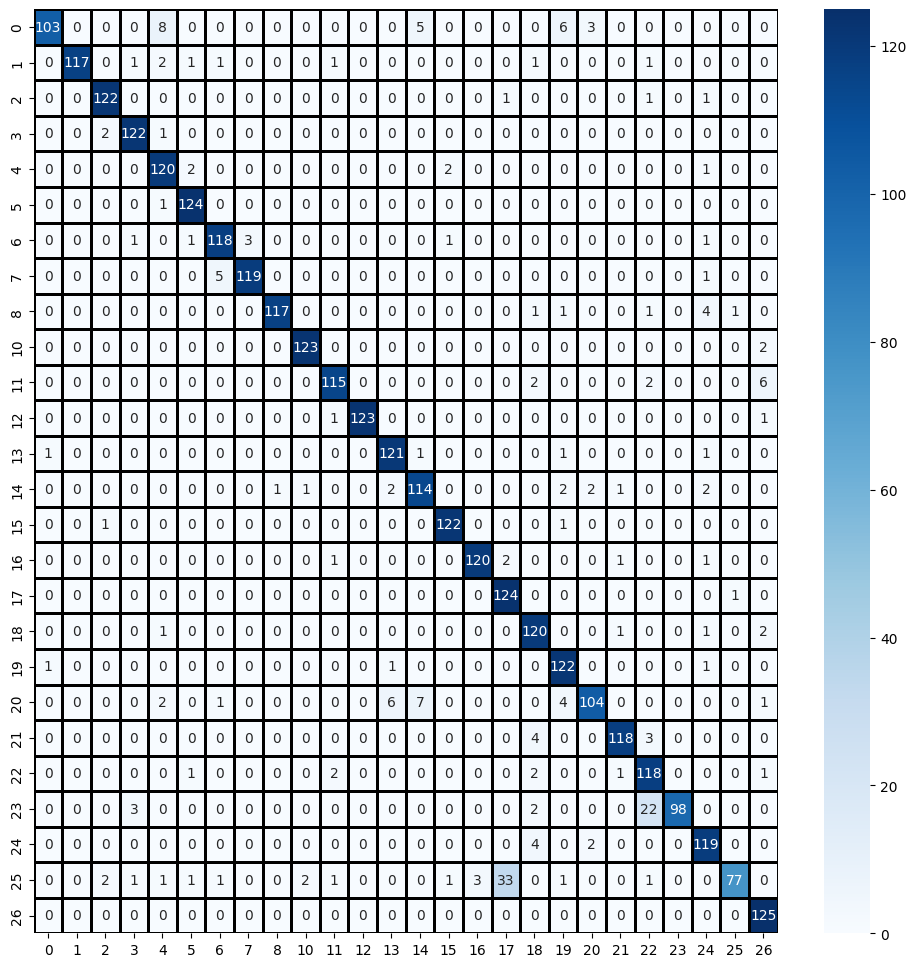

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(np.argmax(val_label, axis=1), np.argmax(predictions, axis=1))
cm = pd.DataFrame(cm , index = [i for i in range(27) if i != 9] , columns = [i for i in range(27) if i != 9])
plt.figure(figsize = (12,12))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
#saved_model_path = "./bicaraku.h5"

#model.save(saved_model_path)

In [ ]:
#!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-05-24 01:28:13.845409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
